# Seattle Police Department 911 Incident Response

## 1.4 million responses from 2009 onwards
#### https://www.kaggle.com/sohier/seattle-police-department-911-incident-response

## Imports

In [443]:
import pandas as pd 
import numpy as np
import pixiedust
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from pathlib import Path
import seaborn as sns 
sns.set()

## Read csv files

In [444]:
data_folder = Path("seattle-data/")

crimes = pd.read_csv(data_folder / 'Seattle_Police_Department_911_Incident_Response.csv', error_bad_lines=False)
crimes.head()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
0,﻿15736,10000246357,2010246357,242.0,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,07/17/2010 08:49:00 PM,3XX BLOCK OF PINE ST,M,M2,8100.2001,-122.338147,47.610975,"(47.610975163, -122.338146748)",NaN,NaN,NaN,NaN
1,15737,10000246471,2010246471,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,07/17/2010 08:50:00 PM,36XX BLOCK OF DISCOVERY PARK BLVD,Q,Q1,5700.1012,-122.404613,47.658325,"(47.658324899, -122.404612874)",NaN,NaN,NaN,NaN
2,15738,10000246255,2010246255,250.0,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",07/17/2010 08:55:00 PM,21XX BLOCK OF 3RD AVE,M,M2,7200.2025,-122.342843,47.613551,"(47.613551471, -122.342843234)",NaN,NaN,NaN,NaN
3,15739,10000246473,2010246473,460.0,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,07/17/2010 09:00:00 PM,7XX BLOCK OF ROY ST,D,D1,7200.1002,-122.341847,47.625401,"(47.625401388, -122.341846999)",NaN,NaN,NaN,NaN
4,15740,10000246330,2010246330,250.0,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",07/17/2010 09:00:00 PM,9XX BLOCK OF ALOHA ST,D,D1,6700.1009,-122.339709,47.627425,"(47.627424837, -122.339708605)",NaN,NaN,NaN,NaN


In [445]:
# View all columns and data types
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433853 entries, 0 to 1433852
Data columns (total 19 columns):
CAD CDW ID                     1433853 non-null object
CAD Event Number               1433853 non-null int64
General Offense Number         1433853 non-null int64
Event Clearance Code           1422435 non-null float64
Event Clearance Description    1422434 non-null object
Event Clearance SubGroup       1422434 non-null object
Event Clearance Group          1422434 non-null object
Event Clearance Date           1422269 non-null object
Hundred Block Location         1430366 non-null object
District/Sector                1432684 non-null object
Zone/Beat                      1433852 non-null object
Census Tract                   1431089 non-null float64
Longitude                      1433852 non-null float64
Latitude                       1433852 non-null float64
Incident Location              1433852 non-null object
Initial Type Description       856040 non-null object
Initia

## Value Counts for Locations

In [446]:
print('Hundred Block Location: ', crimes["Hundred Block Location"].value_counts().size)
print()

print('District/Sector: ', crimes["District/Sector"].value_counts().size)
print()

print('Zone/Beat: ', crimes["Zone/Beat"].value_counts().size)
print()

print('Census Tract: ', crimes["Census Tract"].value_counts().size)

Hundred Block Location:  60633

District/Sector:  19

Zone/Beat:  90

Census Tract:  13495


## View 'District/Sector'
#### Use 'District/Sector' for location

In [447]:
# Districts
print('Unique values of District/Sector: ', crimes["District/Sector"].value_counts().size)
print()

# Sort values and count
crimes.groupby('District/Sector').size().sort_values()

Unique values of District/Sector:  19



District/Sector
H          9
99      1517
F      62320
G      63930
S      68356
O      69087
L      71748
C      72302
W      73049
Q      74867
R      76149
J      77470
B      84228
N      84474
U      89065
D      96173
E     104795
M     129257
K     133888
dtype: int64

## View 'Zone/Beat'

In [448]:
print('Unique values of Zone/Beat: ', crimes["Zone/Beat"].value_counts().size)
print()

# Sort values and count
crimes.groupby('Zone/Beat').size().sort_values()

Unique values of Zone/Beat:  90



Zone/Beat
US            1
EDD           1
CCD           1
KCIO07        1
QS            2
TAC3          2
NP            2
H3            4
GS            4
CS            4
SCTR1         4
H2            5
JS            5
BS            6
SP            7
ES            7
LAPT          8
COMM          9
RS           11
NS           12
FS           12
LS           13
INV          14
EP           14
SS           15
OS           16
CTY          17
WS           20
KS           27
N            34
          ...  
L1        25098
S2        25237
N1        25994
J3        26339
Q2        26475
C2        26520
E3        26579
R1        26796
B3        27267
J2        27845
B1        28044
U3        28604
O2        28832
U1        28895
B2        28903
Q3        30018
D3        30086
W1        30225
D1        31343
U2        31581
E1        33997
N3        34137
M1        34618
D2        34766
K1        41498
E2        44258
K3        44781
M3        45339
K2        47656
M2        49366
Length: 90, dt

## Drop 'District/Sector' with low value count

In [449]:
crimes = crimes[crimes['District/Sector'] != 'H']

In [450]:
crimes = crimes[crimes['District/Sector'] != '99']

## Check unique values again

In [451]:
# Districts
print('Unique values of District/Sector: ', crimes["District/Sector"].value_counts().size)
print()

# Sort values and count
crimes.groupby('District/Sector').size().sort_values()

Unique values of District/Sector:  17



District/Sector
F     62320
G     63930
S     68356
O     69087
L     71748
C     72302
W     73049
Q     74867
R     76149
J     77470
B     84228
N     84474
U     89065
D     96173
E    104795
M    129257
K    133888
dtype: int64

## Remove duplicates and view data

In [452]:
print('Dataset ready..')

print('Dataset Shape before drop_duplicate : ', crimes.shape)
crimes.drop_duplicates(subset=['CAD CDW ID'], keep='first', inplace=True)
print('Dataset Shape after drop_duplicate: ', crimes.shape)

crimes.head(2)

Dataset ready..
Dataset Shape before drop_duplicate :  (1432327, 19)
Dataset Shape after drop_duplicate:  (1432300, 19)


,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
0,﻿15736,10000246357,2010246357,242.0,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,07/17/2010 08:49:00 PM,3XX BLOCK OF PINE ST,M,M2,8100.2001,-122.338147,47.610975,"(47.610975163, -122.338146748)",NaN,NaN,NaN,NaN
1,15737,10000246471,2010246471,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,07/17/2010 08:50:00 PM,36XX BLOCK OF DISCOVERY PARK BLVD,Q,Q1,5700.1012,-122.404613,47.658325,"(47.658324899, -122.404612874)",NaN,NaN,NaN,NaN


In [453]:
print('Dataset ready..')

print('Dataset Shape before drop_duplicate : ', crimes.shape)
crimes.drop_duplicates(subset=['CAD Event Number'], keep='first', inplace=True)
print('Dataset Shape after drop_duplicate: ', crimes.shape)

crimes.head(2)

Dataset ready..
Dataset Shape before drop_duplicate :  (1432300, 19)
Dataset Shape after drop_duplicate:  (1420673, 19)


,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
0,﻿15736,10000246357,2010246357,242.0,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,07/17/2010 08:49:00 PM,3XX BLOCK OF PINE ST,M,M2,8100.2001,-122.338147,47.610975,"(47.610975163, -122.338146748)",NaN,NaN,NaN,NaN
1,15737,10000246471,2010246471,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,07/17/2010 08:50:00 PM,36XX BLOCK OF DISCOVERY PARK BLVD,Q,Q1,5700.1012,-122.404613,47.658325,"(47.658324899, -122.404612874)",NaN,NaN,NaN,NaN


## Columns

In [454]:
crimes.columns

Index(['CAD CDW ID', 'CAD Event Number', 'General Offense Number',
       'Event Clearance Code', 'Event Clearance Description',
       'Event Clearance SubGroup', 'Event Clearance Group',
       'Event Clearance Date', 'Hundred Block Location', 'District/Sector',
       'Zone/Beat', 'Census Tract', 'Longitude', 'Latitude',
       'Incident Location', 'Initial Type Description',
       'Initial Type Subgroup', 'Initial Type Group', 'At Scene Time'],
      dtype='object')

## Create a new dataframe including Lon and Lat (In case we need it)

In [455]:
# crimes_lon_lat = crimes
# crimes_lon_lat.head(1)

In [456]:
crimes.head(1)

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
0,﻿15736,10000246357,2010246357,242.0,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,07/17/2010 08:49:00 PM,3XX BLOCK OF PINE ST,M,M2,8100.2001,-122.338147,47.610975,"(47.610975163, -122.338146748)",NaN,NaN,NaN,NaN


## Drop unwanted columns 

In [457]:
crimes.drop(['CAD Event Number', 'General Offense Number',
       'Event Clearance Code', 'Event Clearance Description',
       'Event Clearance Group',
       'Hundred Block Location', 'Zone/Beat',
       'Census Tract', 'Longitude', 'Latitude',
       'Incident Location', 'Initial Type Description',
       'Initial Type Subgroup', 'Initial Type Group', 'At Scene Time'], inplace=True, axis=1)
crimes.columns

Index(['CAD CDW ID', 'Event Clearance SubGroup', 'Event Clearance Date',
       'District/Sector'],
      dtype='object')

In [458]:
crimes.head(2)

,CAD CDW ID,Event Clearance SubGroup,Event Clearance Date,District/Sector
0,﻿15736,DISTURBANCES,07/17/2010 08:49:00 PM,M
1,15737,THEFT,07/17/2010 08:50:00 PM,Q


## Count column - Type of crime 

In [459]:
print('Unique values of crime type: ', crimes["Event Clearance SubGroup"].value_counts().size)
print()

# Sort values and count
crimes.groupby('Event Clearance SubGroup').size().sort_values()

Unique values of crime type:  45



Event Clearance SubGroup
HOMICIDE                             225
RECKLESS BURNING                     283
VEHICLE ALACAD (FALSE)               306
PUBLIC GATHERINGS                    344
SEX OFFENSE (NO RAPE)                389
VEHICLE ALARMS (FALSE)               923
HARBOR CALLS                        1128
WEAPONS CALLS                       1389
PROWLER                             2026
PANIC ALACAD (FALSE)                2093
ANIMAL COMPLAINTS                   3878
VICE CALLS                          3933
PANIC ALARMS (FALSE)                4003
MISCELLANEOUS MISDEMEANORS          4548
PARKS EXCLUSIONS                    4959
ROBBERY                             5369
GUN CALLS                           6309
PERSONS - LOST, FOUND, MISSING      6707
AUTO RECOVERIES                     7750
NOISE DISTURBANCE                   8421
CASUALTIES                          9757
COMMERCIAL BURGLARIES              10023
CRISIS CALL                        11613
THREATS, HARASSMENT             

## Drop rows where 'Text_General_Code' = 'All Other Offenses'

In [460]:
# print('Dataset Shape before drop : ', crimes.shape)
# crimes = crimes[crimes['Text_General_Code'] != 'All Other Offenses']
# print('Dataset Shape after drop: ', crimes.shape)

## Find any columns that have NaN values

In [461]:
crimes.isnull().any()

CAD CDW ID                  False
Event Clearance SubGroup     True
Event Clearance Date         True
District/Sector              True
dtype: bool

## Count null values

In [462]:
print('CAD CDW ID: ',crimes['CAD CDW ID'].isnull().sum())
print('Event Clearance SubGroup: ',crimes['Event Clearance SubGroup'].isnull().sum())
print('Event Clearance Date: ',crimes['Event Clearance Date'].isnull().sum())
print('District/Sector: ',crimes['District/Sector'].isnull().sum())

CAD CDW ID:  0
Event Clearance SubGroup:  11383
Event Clearance Date:  11546
District/Sector:  1168


## Drop rows with null values

In [463]:
print("Event Clearance Date")

print('Shape before: ',crimes.shape)
print()
print('Rows with NaN entries before drop')
print(crimes['Event Clearance Date'].isnull().sum())
crimes.dropna(inplace = True)
print()
print('Rows with NaN entries after drop')
print(crimes['Event Clearance Date'].isnull().sum())
print()
print('Shape after: ',crimes.shape)

Event Clearance Date
Shape before:  (1420673, 4)

Rows with NaN entries before drop
11546

Rows with NaN entries after drop
0

Shape after:  (1407973, 4)


## Are there any more rows with null values

In [464]:
crimes.isnull().any()

CAD CDW ID                  False
Event Clearance SubGroup    False
Event Clearance Date        False
District/Sector             False
dtype: bool

## Count null values

In [465]:
print('CAD CDW ID: ',crimes['CAD CDW ID'].isnull().sum())
print('Event Clearance SubGroup: ',crimes['Event Clearance SubGroup'].isnull().sum())
print('Event Clearance Date: ',crimes['Event Clearance Date'].isnull().sum())
print('District/Sector: ',crimes['District/Sector'].isnull().sum())

CAD CDW ID:  0
Event Clearance SubGroup:  0
Event Clearance Date:  0
District/Sector:  0


## Drop any more null values

In [466]:
# print('Shape before: ',crimes.shape)
# print()
# print('Rows with NaN entries before')
# print('Police_Districts: ',crimes['Police_Districts'].isnull().sum())
# crimes.dropna(inplace = True)
# print()
# print('Rows with NaN entries after')
# print('Police_Districts: ',crimes['Police_Districts'].isnull().sum())
# print()
# print('Shape after: ',crimes.shape)

In [467]:
crimes.head(2)

,CAD CDW ID,Event Clearance SubGroup,Event Clearance Date,District/Sector
0,﻿15736,DISTURBANCES,07/17/2010 08:49:00 PM,M
1,15737,THEFT,07/17/2010 08:50:00 PM,Q


## Convert dates to Pandas datetime format

In [468]:
crimes['Event Clearance Date'] = pd.to_datetime(crimes['Event Clearance Date'], format='%m/%d/%Y %I:%M:%S %p')

In [469]:
crimes.head()

,CAD CDW ID,Event Clearance SubGroup,Event Clearance Date,District/Sector
0,﻿15736,DISTURBANCES,2010-07-17 20:49:00,M
1,15737,THEFT,2010-07-17 20:50:00,Q
2,15738,"NUISANCE, MISCHIEF COMPLAINTS",2010-07-17 20:55:00,M
3,15739,TRAFFIC RELATED CALLS,2010-07-17 21:00:00,D
4,15740,"NUISANCE, MISCHIEF COMPLAINTS",2010-07-17 21:00:00,D


## Add extra 'month', 'day', 'weekday' and 'hour' columns

In [470]:
crimes['month'] = crimes['Event Clearance Date'].dt.month
crimes['day'] = crimes['Event Clearance Date'].dt.day
crimes['weekday'] = crimes['Event Clearance Date'].dt.weekday
crimes['hour'] = crimes['Event Clearance Date'].dt.hour
crimes.head(2)

,CAD CDW ID,Event Clearance SubGroup,Event Clearance Date,District/Sector,month,day,weekday,hour
0,﻿15736,DISTURBANCES,2010-07-17 20:49:00,M,7,17,5,20
1,15737,THEFT,2010-07-17 20:50:00,Q,7,17,5,20


## Set the index to be the date

In [471]:
crimes.index = pd.DatetimeIndex(crimes['Event Clearance Date'])

## View data

In [472]:
print("Shape: ",crimes.shape)
crimes.sample(n=5)

Shape:  (1407973, 8)


,CAD CDW ID,Event Clearance SubGroup,Event Clearance Date,District/Sector,month,day,weekday,hour
Event Clearance Date,,,,,,,,
2010-10-09 15:21:00,89441,"THREATS, HARASSMENT",2010-10-09 15:21:00,B,10,9,5,15
2012-11-11 11:32:00,958681,NARCOTICS COMPLAINTS,2012-11-11 11:32:00,F,11,11,6,11
2012-12-23 01:28:00,1001410,DISTURBANCES,2012-12-23 01:28:00,E,12,23,6,1
2016-09-28 14:08:49,1843790,SUSPICIOUS CIRCUMSTANCES,2016-09-28 14:08:49,U,9,28,2,14
2015-10-14 19:43:00,1581082,THEFT,2015-10-14 19:43:00,M,10,14,2,19


## View columns and data types

In [473]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1407973 entries, 2010-07-17 20:49:00 to 2017-08-22 23:48:10
Data columns (total 8 columns):
CAD CDW ID                  1407973 non-null object
Event Clearance SubGroup    1407973 non-null object
Event Clearance Date        1407973 non-null datetime64[ns]
District/Sector             1407973 non-null object
month                       1407973 non-null int64
day                         1407973 non-null int64
weekday                     1407973 non-null int64
hour                        1407973 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 96.7+ MB


## Convert certain columns into 'Categorical' types

In [474]:
# crimes['Text_General_Code'] = pd.Categorical(crimes['Text_General_Code'])
# crimes['Location_Block'] = pd.Categorical(crimes['Location_Block'])
# crimes['Police_Districts'] = pd.Categorical(crimes['Police_Districts'])

# crimes.info()

## Plot Crimes per Month

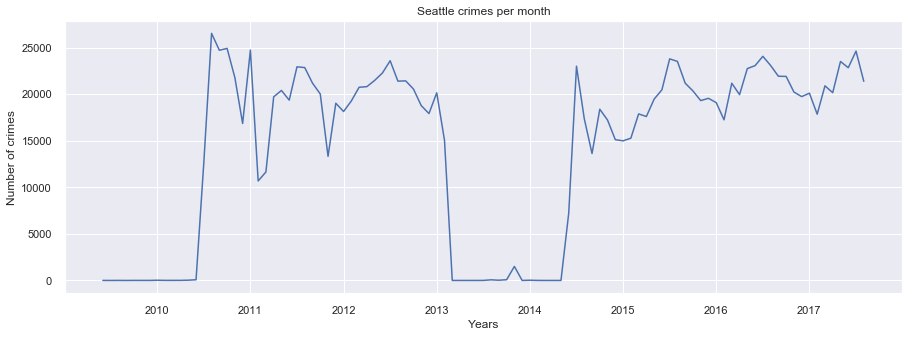

In [475]:
plt.figure(figsize=(15,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Seattle crimes per month')
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.show()

## Rolling sum of all crimes

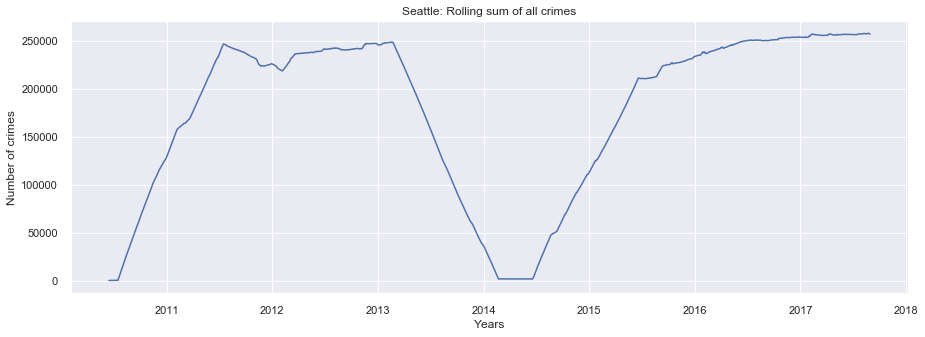

In [476]:
plt.figure(figsize=(15,5))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Seattle: Rolling sum of all crimes')
plt.ylabel('Number of crimes')
plt.xlabel('Years')
plt.show()

## Plot different types of crime (Rolling Sum)

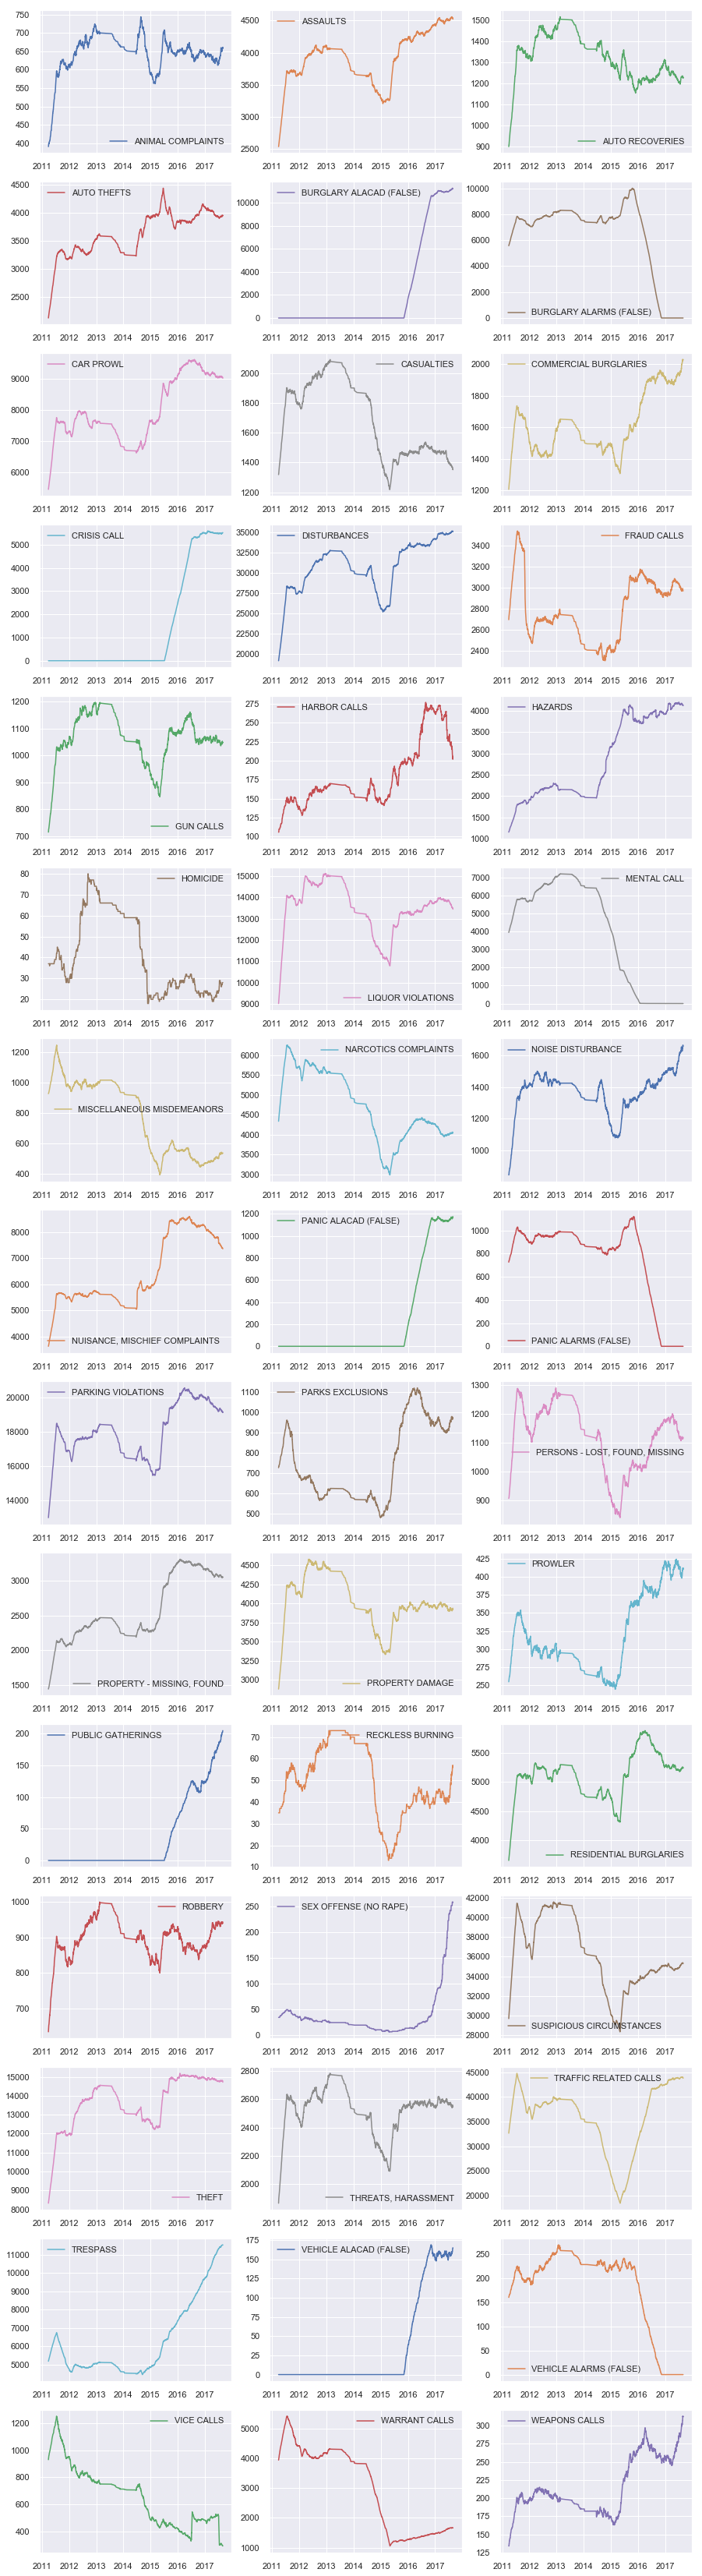

In [477]:
crimes_count_date = crimes.pivot_table('Event Clearance Date', aggfunc=np.size, columns='Event Clearance SubGroup', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(15, 60), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

## Number of crimes by month of the year

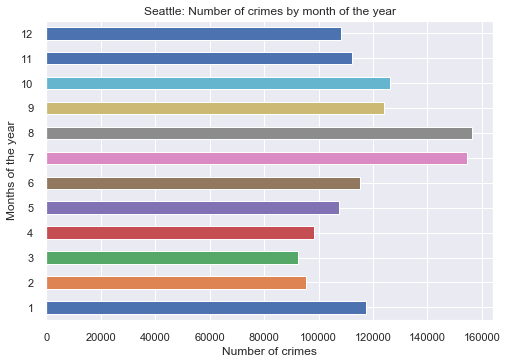

In [478]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Seattle: Number of crimes by month of the year')
plt.show()

## Number of crimes by type

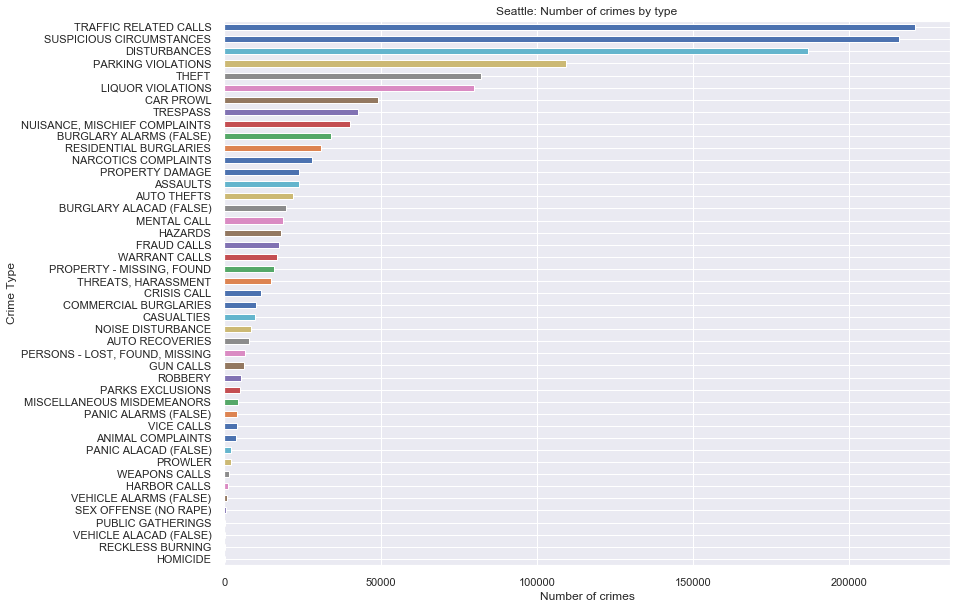

In [479]:
plt.figure(figsize=(13,10))
crimes.groupby([crimes['Event Clearance SubGroup']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Seattle: Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

## Heatmap - Hour by Crime Type

Text(0.5,1,'Seattle: Hour by Crime Type')

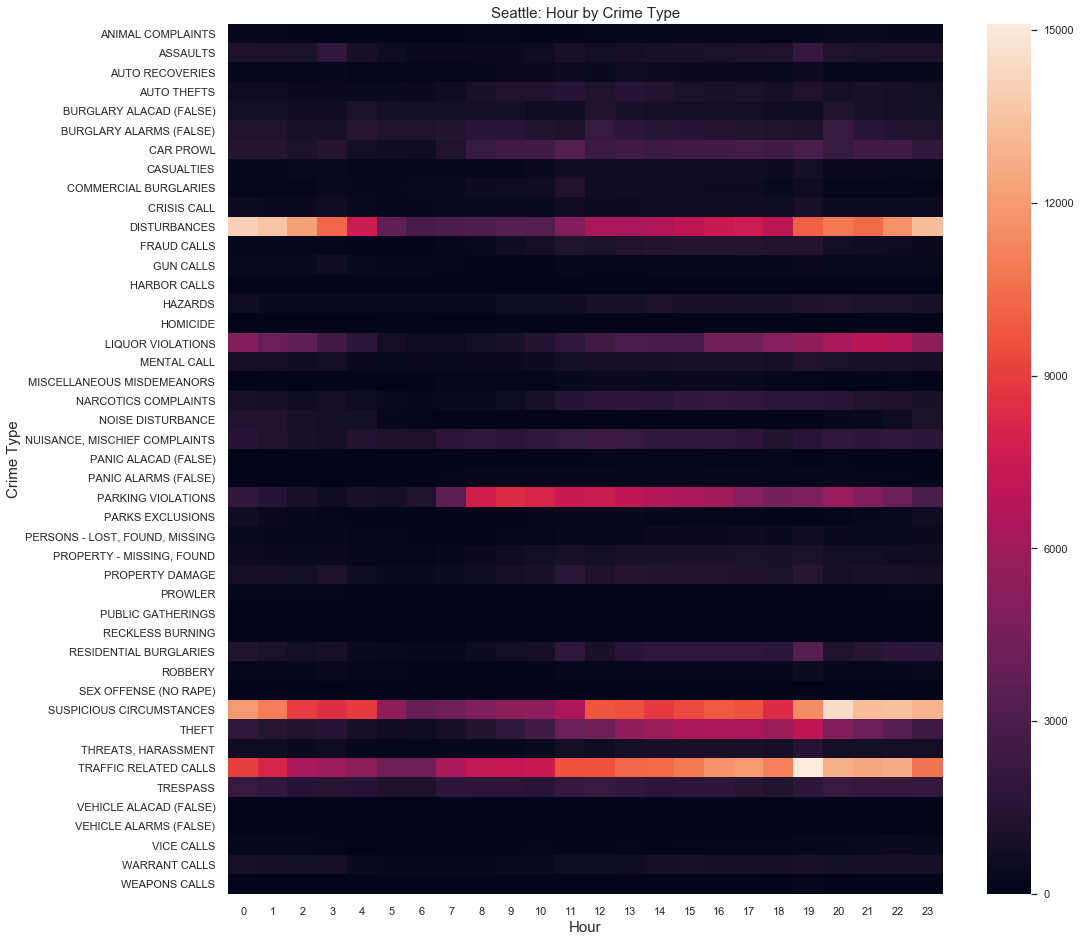

In [480]:
hour_by_type = crimes.pivot_table(values='Event Clearance Date', index='Event Clearance SubGroup', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,16))
ax = sns.heatmap(hour_by_type)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Crime Type', fontsize=15)
ax.set_title('Seattle: Hour by Crime Type', fontsize=15)

## Serialize 'Zone/Beat'

In [481]:
# print('Unique values of Zone/Beat: ', crimes["Zone/Beat"].value_counts().size)
# print()

# # Sort values and count
# crimes.groupby('Zone/Beat').size().sort_values()

In [482]:
# #serialize
# import xlrd
# ############################
# from pathlib import Path
# ############################

# data_folder = Path("seattle-data/")

# serialized_primary_type_dict = {}
# wb = xlrd.open_workbook(data_folder / 'crime_type_mapping.xlsx')
# sh = wb.sheet_by_index(0)   
# for i in range(90):
#     cell_value_primary_type = sh.cell(i,6).value
#     cell_value_serialized_primary_type = sh.cell(i,7).value
#     serialized_primary_type_dict[cell_value_primary_type] = cell_value_serialized_primary_type

In [483]:
# #create new serialized column
# crimes['Zone/Beat'] = crimes['Zone/Beat'].map(serialized_primary_type_dict)

# crimes.head(2)

In [484]:
crimes.head()

,CAD CDW ID,Event Clearance SubGroup,Event Clearance Date,District/Sector,month,day,weekday,hour
Event Clearance Date,,,,,,,,
2010-07-17 20:49:00,﻿15736,DISTURBANCES,2010-07-17 20:49:00,M,7,17,5,20
2010-07-17 20:50:00,15737,THEFT,2010-07-17 20:50:00,Q,7,17,5,20
2010-07-17 20:55:00,15738,"NUISANCE, MISCHIEF COMPLAINTS",2010-07-17 20:55:00,M,7,17,5,20
2010-07-17 21:00:00,15739,TRAFFIC RELATED CALLS,2010-07-17 21:00:00,D,7,17,5,21
2010-07-17 21:00:00,15740,"NUISANCE, MISCHIEF COMPLAINTS",2010-07-17 21:00:00,D,7,17,5,21


## Number of crimes by location

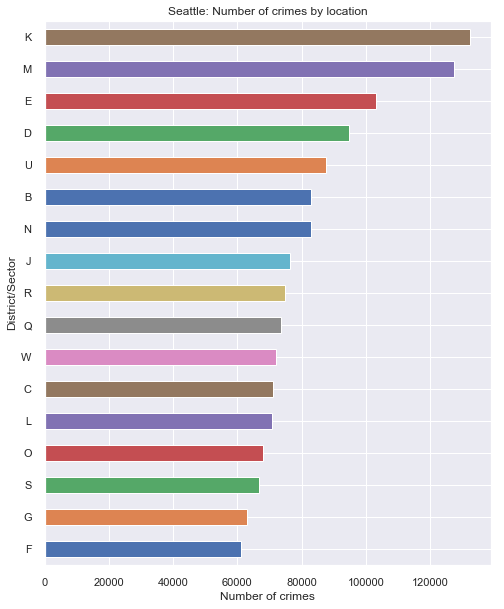

In [485]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['District/Sector']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Seattle: Number of crimes by location')
plt.ylabel('District/Sector')
plt.xlabel('Number of crimes')
plt.show()

## Heatmap - Hour by location

Text(0.5,1,'Seattle: Hour by District/Sector')

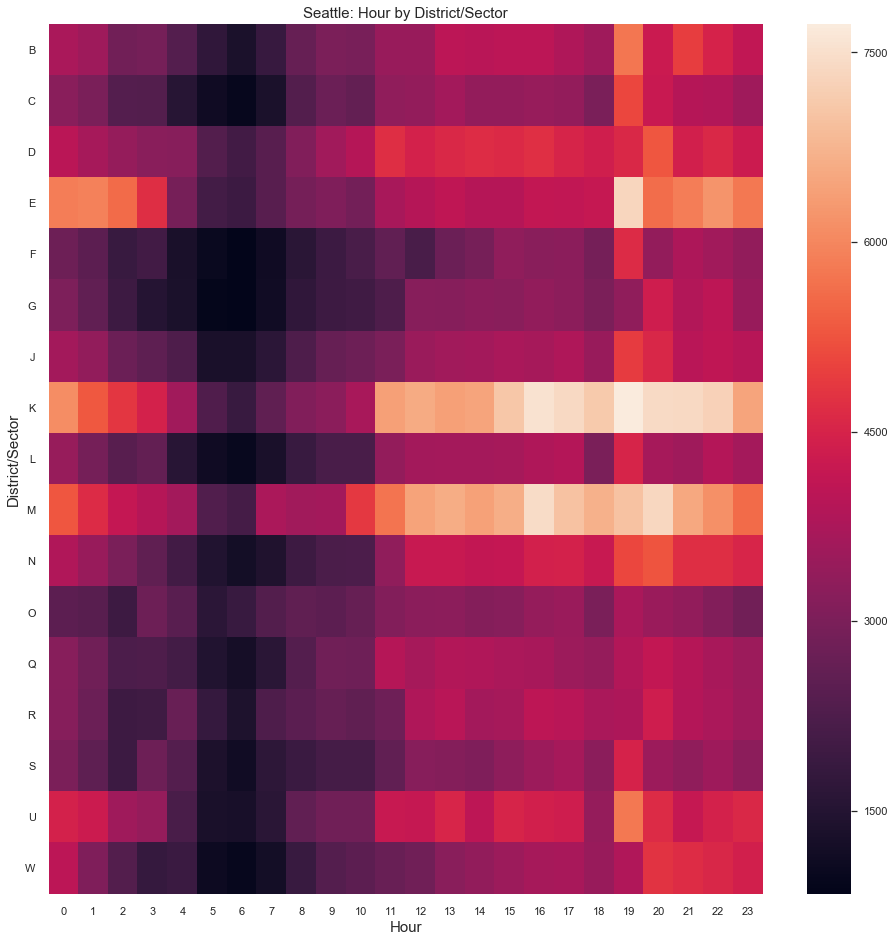

In [486]:
hour_by_location = crimes.pivot_table(values='Event Clearance Date', index='District/Sector', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,16))
ax = sns.heatmap(hour_by_location)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('District/Sector', fontsize=15)
plt.yticks(rotation='horizontal')
ax.set_title('Seattle: Hour by District/Sector', fontsize=15)

## Number of crimes by day of the week

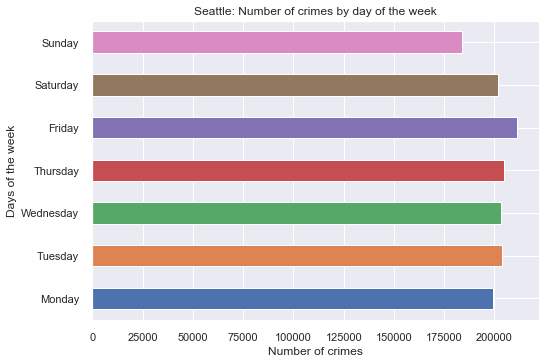

In [487]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Seattle: Number of crimes by day of the week')
plt.show()

## Heatmap - Hour by Week

Text(0.5,1,'Seattle: Hour by Day of Week')

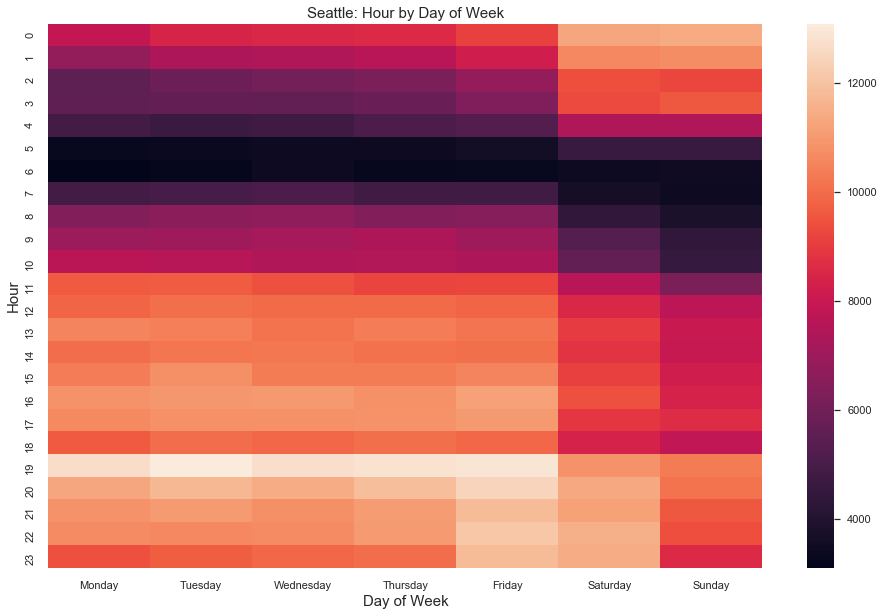

In [549]:
hour_by_week = crimes.pivot_table(values='Event Clearance Date', index=crimes.index.hour, columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
hour_by_week = hour_by_week[days]

plt.figure(figsize=(16,10))
ax = sns.heatmap(hour_by_week)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Hour', fontsize=15)
ax.set_title('Seattle: Hour by Day of Week', fontsize=15)

## Reorder columns according to the the order of days

In [489]:
hour_by_week = hour_by_week[days].T 

## Heatmap - Day of Week by Location

Text(0.5,1,'Seattle: Day of Week by District/Sector')

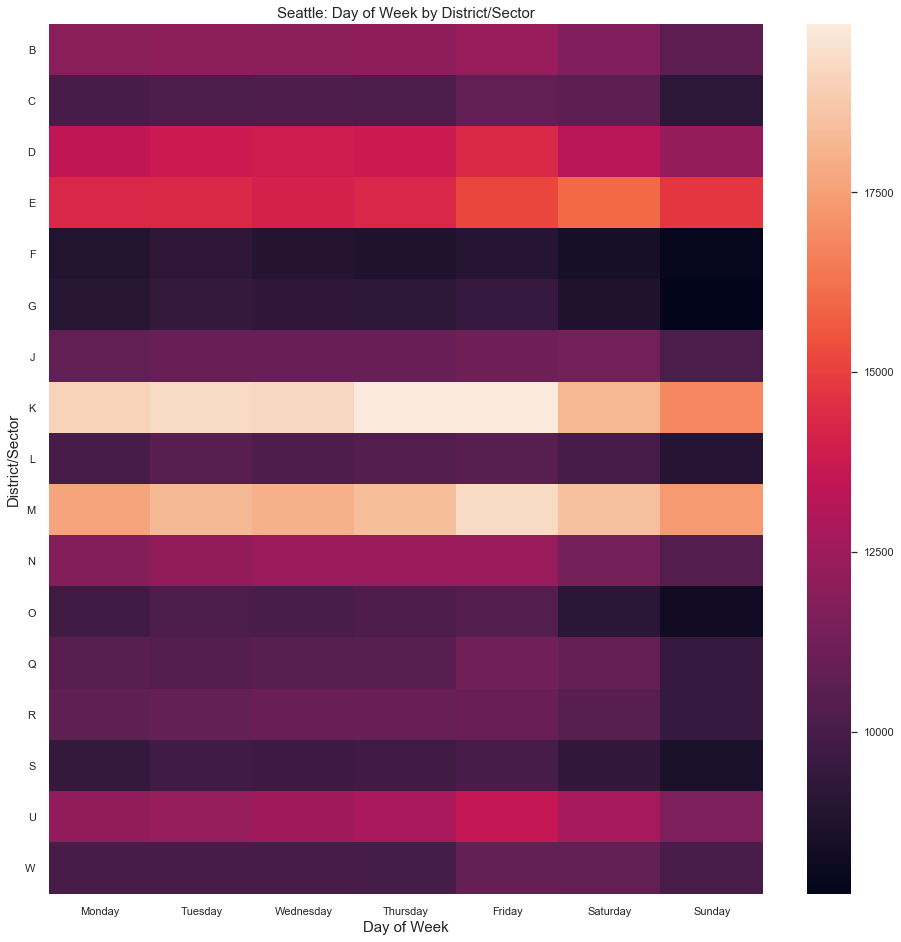

In [490]:
dayofweek_by_location = crimes.pivot_table(values='Event Clearance Date', index='District/Sector', columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
dayofweek_by_location = dayofweek_by_location[days]

plt.figure(figsize=(16,10))
ax = sns.heatmap(dayofweek_by_location)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('District/Sector', fontsize=15)
plt.yticks(rotation='horizontal')
ax.set_title('Seattle: Day of Week by District/Sector', fontsize=15)

## Heatmap - Day of Week by Type

Text(0.5,1,'Seattle: Day of Week by Crime Type')

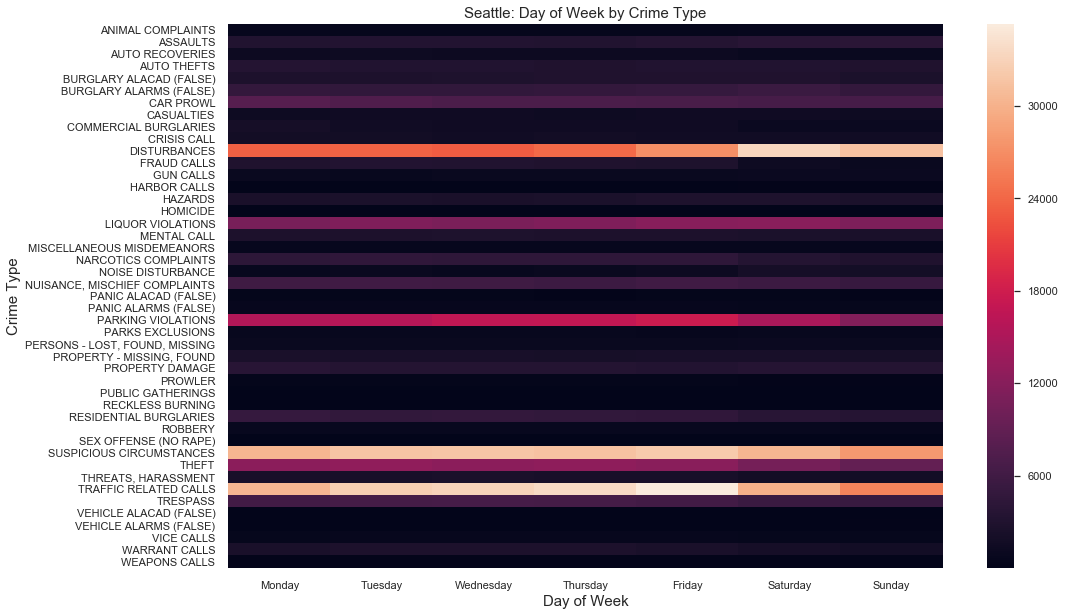

In [548]:
dayofweek_by_type = crimes.pivot_table(values='Event Clearance Date', index='Event Clearance SubGroup', columns=crimes.index.weekday_name, aggfunc = np.size).fillna(0)
dayofweek_by_type=dayofweek_by_type[days]

plt.figure(figsize=(16,10))
ax = sns.heatmap(dayofweek_by_type)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Crime Type', fontsize=15)
ax.set_title('Seattle: Day of Week by Crime Type', fontsize=15)

## Heatmap - Location by Type

Text(0.5,1,'Seattle: District/Sector by Crime Type')

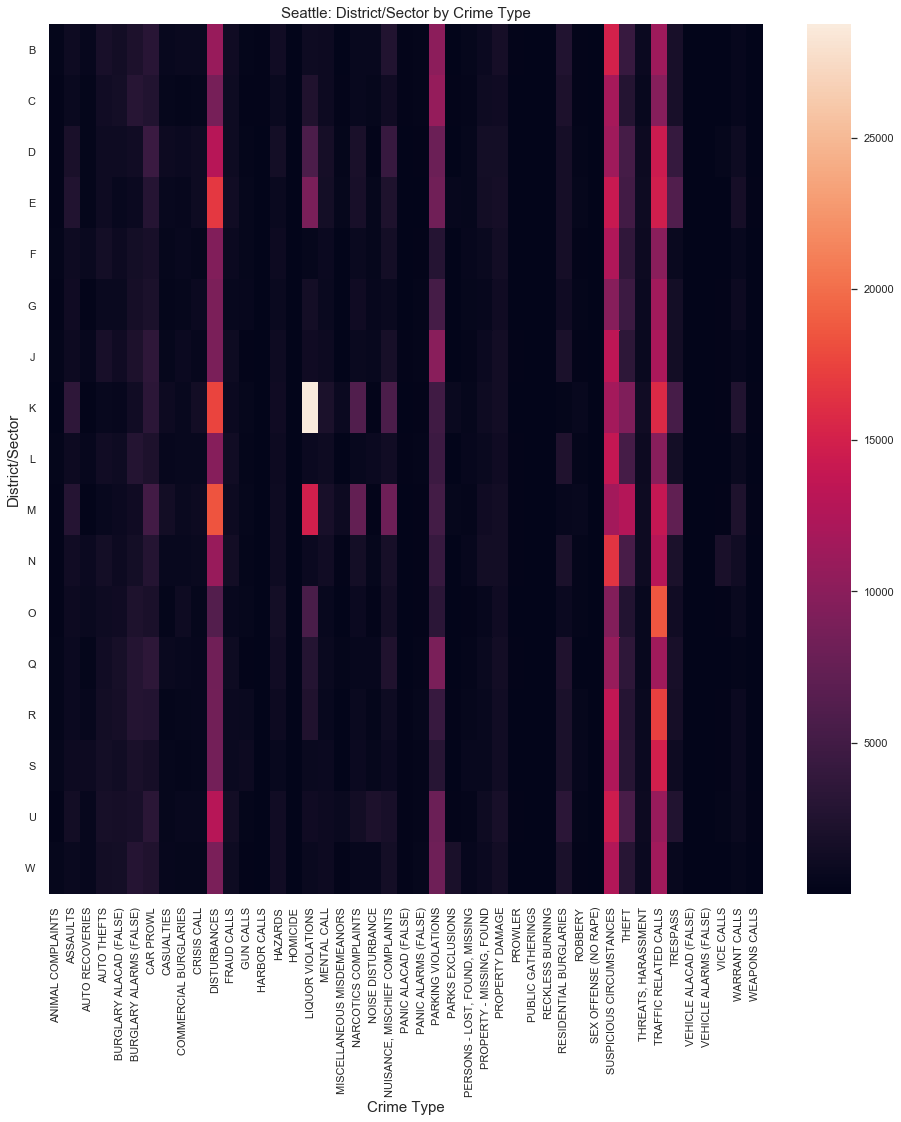

In [492]:
location_by_type  = crimes.pivot_table(values='Event Clearance Date', index='District/Sector', columns='Event Clearance SubGroup', aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,16))
ax = sns.heatmap(location_by_type)
ax.set_xlabel('Crime Type', fontsize=15)
ax.set_ylabel('District/Sector', fontsize=15)
plt.yticks(rotation='horizontal')
ax.set_title('Seattle: District/Sector by Crime Type', fontsize=15)

# Compare Machine Learning Models in Scikit-learn
# --
## View size of dataframe

In [493]:
crimes.shape

(1407973, 8)

In [494]:
crimes.head(1)

,CAD CDW ID,Event Clearance SubGroup,Event Clearance Date,District/Sector,month,day,weekday,hour
Event Clearance Date,,,,,,,,
2010-07-17 20:49:00,﻿15736,DISTURBANCES,2010-07-17 20:49:00,M,7,17,5,20


In [495]:
# Build a new dataframe called 'crimes_learn'
crimes_learn = crimes.loc[:,('month','day','weekday','hour','Event Clearance SubGroup','District/Sector')]
crimes_learn.head(1)

,month,day,weekday,hour,Event Clearance SubGroup,District/Sector
Event Clearance Date,,,,,,
2010-07-17 20:49:00,7,17,5,20,DISTURBANCES,M


## Count column - Type of crime

In [496]:
print('Unique values of Event Clearance SubGroup: ', crimes["Event Clearance SubGroup"].value_counts().size)
print()

# Sort values and count
crimes.groupby('Event Clearance SubGroup').size().sort_values()

Unique values of Event Clearance SubGroup:  45



Event Clearance SubGroup
HOMICIDE                             224
RECKLESS BURNING                     283
VEHICLE ALACAD (FALSE)               306
PUBLIC GATHERINGS                    344
SEX OFFENSE (NO RAPE)                385
VEHICLE ALARMS (FALSE)               923
HARBOR CALLS                        1124
WEAPONS CALLS                       1389
PROWLER                             2024
PANIC ALACAD (FALSE)                2093
ANIMAL COMPLAINTS                   3877
VICE CALLS                          3923
PANIC ALARMS (FALSE)                4002
MISCELLANEOUS MISDEMEANORS          4539
PARKS EXCLUSIONS                    4956
ROBBERY                             5363
GUN CALLS                           6301
PERSONS - LOST, FOUND, MISSING      6703
AUTO RECOVERIES                     7743
NOISE DISTURBANCE                   8421
CASUALTIES                          9751
COMMERCIAL BURGLARIES              10017
CRISIS CALL                        11610
THREATS, HARASSMENT             

# Serialize Crime type
#### Take a selection of crimes and delete the remaining rows

In [497]:
import xlrd
############################
from pathlib import Path
############################

data_folder = Path("seattle-data/")

serialized_primary_type_dict = {}
wb = xlrd.open_workbook(data_folder / 'crime_type_mapping.xlsx')
sh = wb.sheet_by_index(0)   
for i in range(45):
    cell_value_primary_type = sh.cell(i,0).value
    cell_value_serialized_primary_type = sh.cell(i,1).value
    serialized_primary_type_dict[cell_value_primary_type] = cell_value_serialized_primary_type

In [498]:
#create new serialized column for crime type
crimes_learn['CrimeType'] = crimes_learn['Event Clearance SubGroup'].map(serialized_primary_type_dict)

crimes_learn.head(1)

,month,day,weekday,hour,Event Clearance SubGroup,District/Sector,CrimeType
Event Clearance Date,,,,,,,
2010-07-17 20:49:00,7,17,5,20,DISTURBANCES,M,16.0


## Value Count - Type of crime 

In [499]:
print('Unique values of CrimeType: ', crimes_learn["CrimeType"].value_counts().size)
print()

# Sort values and count
crimes_learn.groupby('CrimeType').size().sort_values()

Unique values of CrimeType:  18



CrimeType
1.0      10017
2.0      11610
3.0      15069
4.0      15874
5.0      16701
6.0      21870
7.0      23858
8.0      23992
9.0      28023
10.0     30801
11.0     40315
12.0     42686
13.0     49247
14.0     80038
15.0     81972
16.0    186728
17.0    216017
99.0    513155
dtype: int64

## Drop rows where 'CrimeType' = 99.0
#### This will keep only the crimes we wish to concentrate on or predict location

In [500]:
print('Dataset Shape before drop : ', crimes_learn.shape)
crimes_learn = crimes_learn[crimes_learn['CrimeType'] != 99.0]
print('Dataset Shape after drop: ', crimes_learn.shape)

Dataset Shape before drop :  (1407973, 7)
Dataset Shape after drop:  (894818, 7)


# Reindex dataframe

In [501]:
crimes_learn.index = range(len(crimes_learn))

# Reorganize columns and drop some columns

In [502]:
crimes_learn = crimes_learn[['CrimeType','month','day','weekday','hour','District/Sector']]
crimes_learn.head(2)

,CrimeType,month,day,weekday,hour,District/Sector
0,16.0,7,17,5,20,M
1,15.0,7,17,5,20,Q


In [503]:
crimes_learn.head(10)

,CrimeType,month,day,weekday,hour,District/Sector
0,16.0,7,17,5,20,M
1,15.0,7,17,5,20,Q
2,11.0,7,17,5,20,M
3,11.0,7,17,5,21,D
4,17.0,7,17,5,21,Q
5,14.0,7,17,5,21,K
6,15.0,7,17,5,21,S
7,16.0,7,17,5,21,D
8,12.0,7,17,5,21,K
9,7.0,7,17,5,21,F


## Change 'District/Sector' to numerical value

In [504]:
# Districts
print('Unique values of District/Sector: ', crimes_learn["District/Sector"].value_counts().size)
print()

# Sort values and count
crimes_learn.groupby('District/Sector').size().sort_values()

Unique values of District/Sector:  17



District/Sector
O     36952
S     38240
G     38261
W     38776
F     39586
C     40192
R     42211
Q     42279
J     43974
L     44996
B     50388
N     53367
U     55518
D     61712
E     70830
M     97114
K    100422
dtype: int64

## Check for null values

In [505]:
crimes_learn.isnull().any()

CrimeType          False
month              False
day                False
weekday            False
hour               False
District/Sector    False
dtype: bool

In [506]:
crimes_learn.head(2)

,CrimeType,month,day,weekday,hour,District/Sector
0,16.0,7,17,5,20,M
1,15.0,7,17,5,20,Q


## Serialize location ('District/Sector')

In [507]:
import xlrd
############################
from pathlib import Path
############################

data_folder = Path("seattle-data/")

serialized_primary_type_dict = {}
wb = xlrd.open_workbook(data_folder / 'crime_type_mapping.xlsx')
sh = wb.sheet_by_index(0)   
for i in range(17):
    cell_value_primary_type = sh.cell(i,6).value
    cell_value_serialized_primary_type = sh.cell(i,7).value
    serialized_primary_type_dict[cell_value_primary_type] = cell_value_serialized_primary_type

In [508]:
#create new serialized column
crimes_learn['District/Sector'] = crimes_learn['District/Sector'].map(serialized_primary_type_dict)

crimes_learn.head(2)

,CrimeType,month,day,weekday,hour,District/Sector
0,16.0,7,17,5,20,10.0
1,15.0,7,17,5,20,13.0


## Value Count - District/Sector

In [509]:
print('Unique values of District/Sector: ', crimes_learn["District/Sector"].value_counts().size)
print()

# Sort values and count
crimes_learn.groupby('District/Sector').size().sort_values()

Unique values of District/Sector:  17



District/Sector
12.0     36952
15.0     38240
6.0      38261
17.0     38776
5.0      39586
2.0      40192
14.0     42211
13.0     42279
7.0      43974
9.0      44996
1.0      50388
11.0     53367
16.0     55518
3.0      61712
4.0      70830
10.0     97114
8.0     100422
dtype: int64

## Drop rows where 'New_Crime_Code' = 99.0
#### This will keep only the crimes we wish to concentrate on or predict location

In [510]:
# print('Dataset Shape before drop : ', crimes_learn.shape)
# crimes_learn = crimes_learn[crimes_learn['New_Crime_Code'] != 99.0]
# print('Dataset Shape after drop: ', crimes_learn.shape)

In [511]:
crimes_learn.head()

,CrimeType,month,day,weekday,hour,District/Sector
0,16.0,7,17,5,20,10.0
1,15.0,7,17,5,20,13.0
2,11.0,7,17,5,20,10.0
3,11.0,7,17,5,21,3.0
4,17.0,7,17,5,21,13.0


In [512]:
crimes_learn.shape

(894818, 6)

## Randomly Sample Rows to make dataset smaller

In [513]:
crimes_learn = crimes_learn.sample(n=500000)
crimes_learn.shape

(500000, 6)

## Check for rows with null values

In [514]:
crimes_learn.isnull().any()

CrimeType          False
month              False
day                False
weekday            False
hour               False
District/Sector    False
dtype: bool

## Pairplot

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

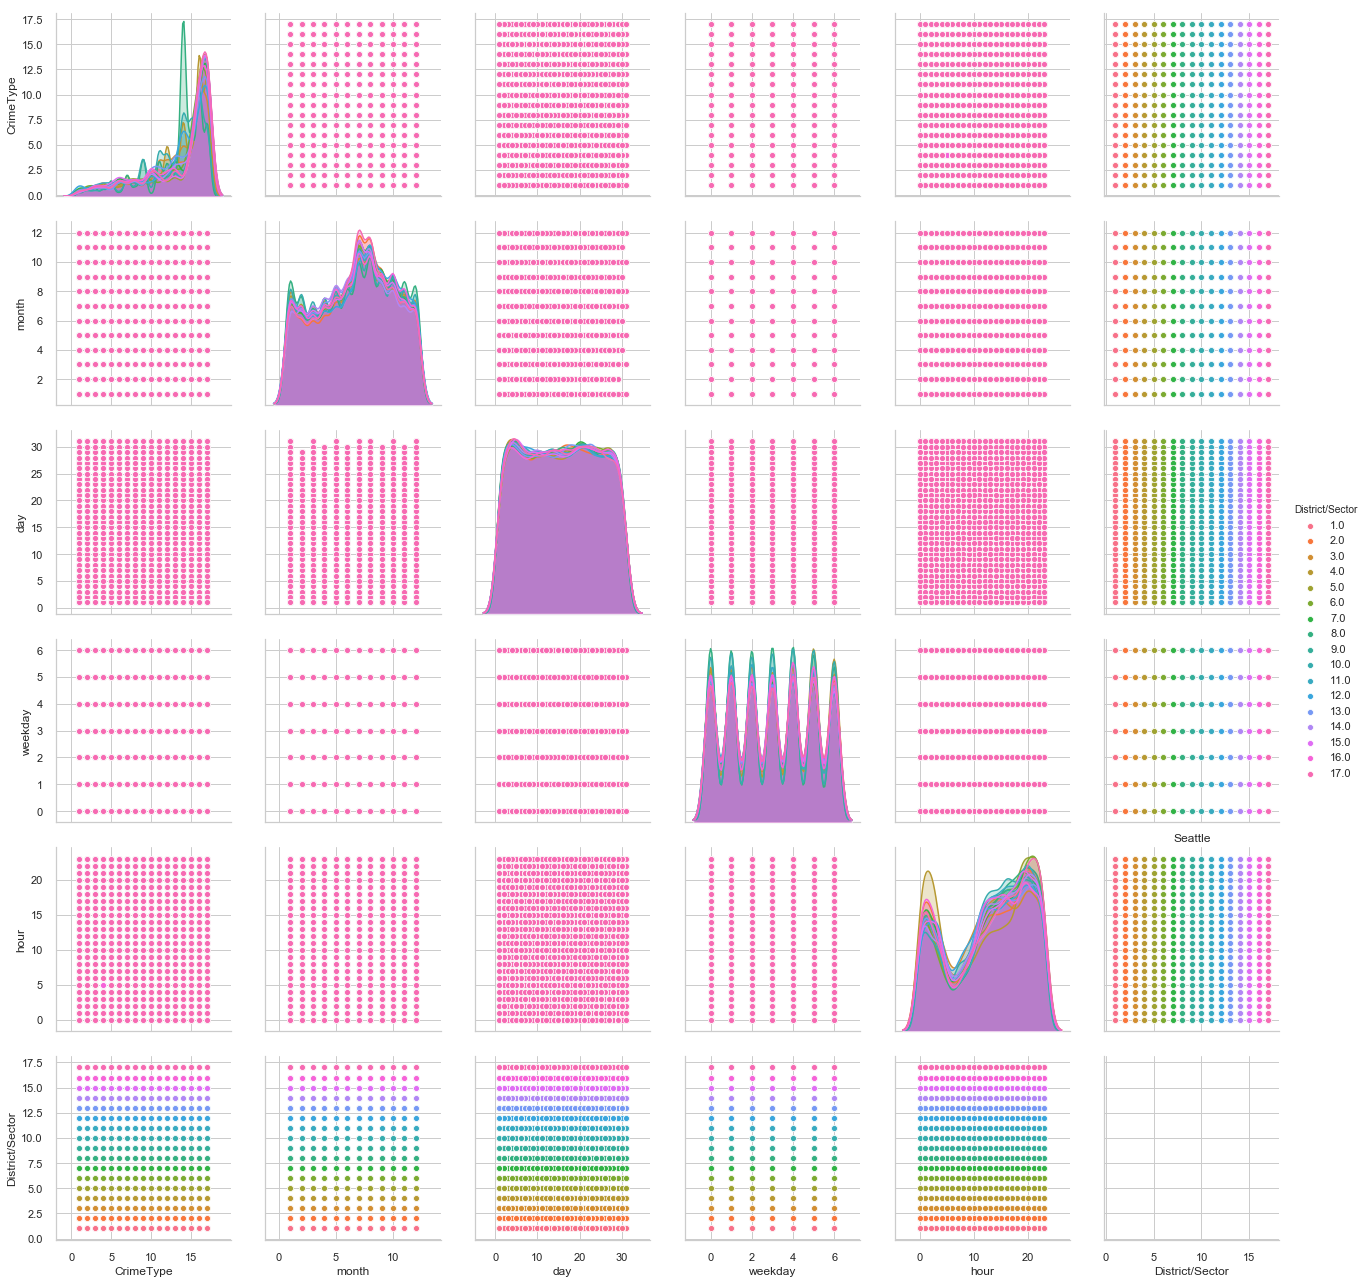

In [515]:
sns.set_style('whitegrid')
sns.pairplot(crimes_learn, hue = 'District/Sector', height = 3)
plt.title('Seattle')
plt.show()

## Univariate analysis

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


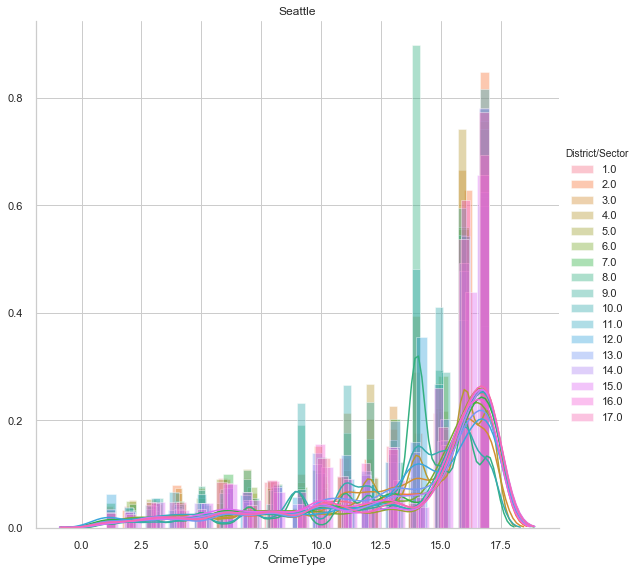

In [516]:
sns.FacetGrid(crimes_learn, hue='District/Sector',height=8).map(sns.distplot, 'CrimeType').add_legend()
plt.title('Seattle')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


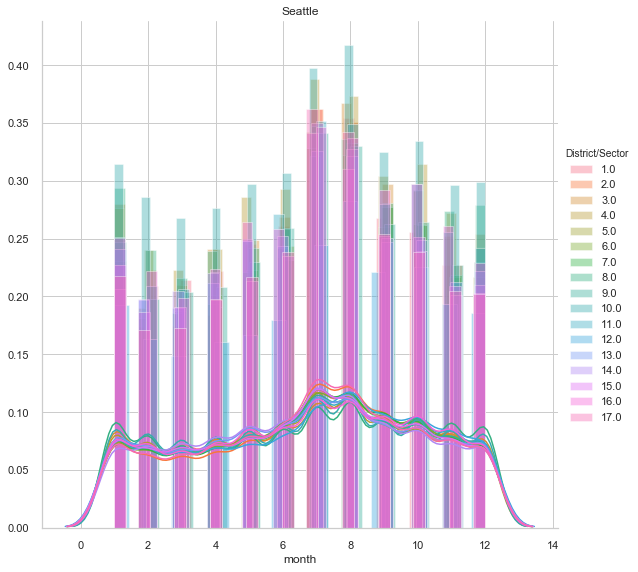

In [517]:
sns.FacetGrid(crimes_learn, hue='District/Sector',height=8).map(sns.distplot, 'month').add_legend()
plt.title('Seattle')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


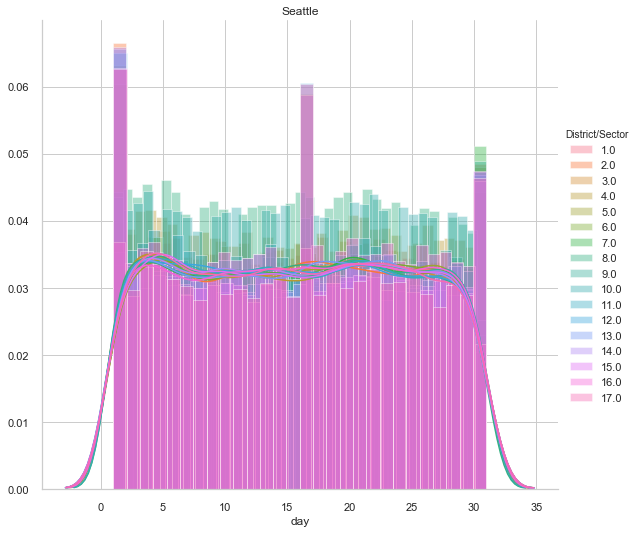

In [518]:
sns.FacetGrid(crimes_learn, hue='District/Sector',height=8).map(sns.distplot, 'day').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Seattle')
plt.show()

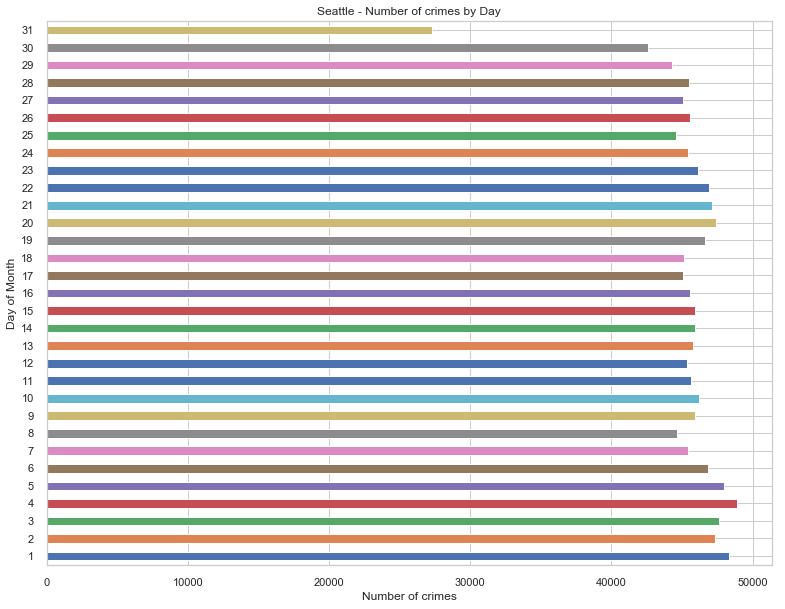

In [546]:
# Number of Crimes by Day
plt.figure(figsize=(13,10))
crimes.groupby([crimes['day']]).size().plot(kind='barh')
plt.title('Seattle - Number of crimes by Day')
plt.ylabel('Day of Month')
plt.xlabel('Number of crimes')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


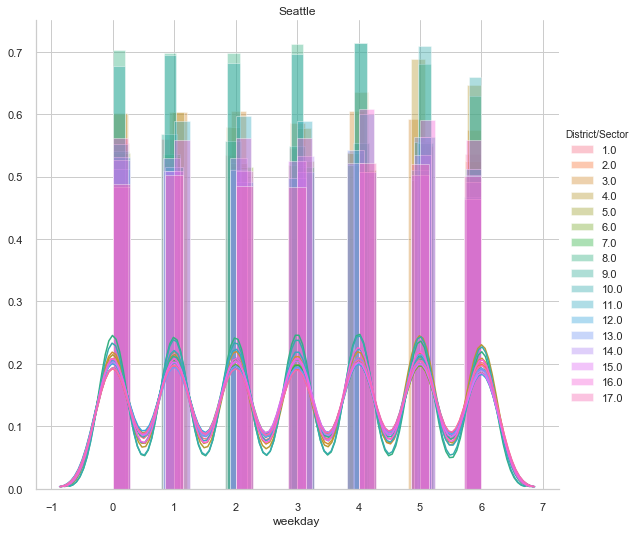

In [519]:
sns.FacetGrid(crimes_learn, hue='District/Sector',height=8).map(sns.distplot, 'weekday').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Seattle')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


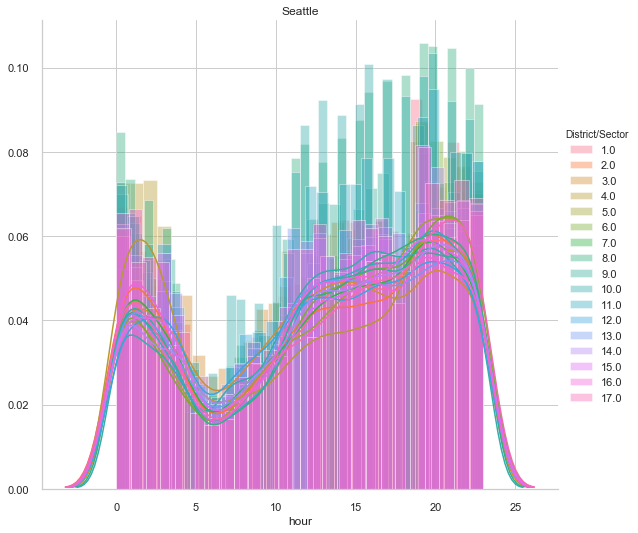

In [520]:
sns.FacetGrid(crimes_learn, hue='District/Sector',height=8).map(sns.distplot, 'hour').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Seattle')
plt.show()

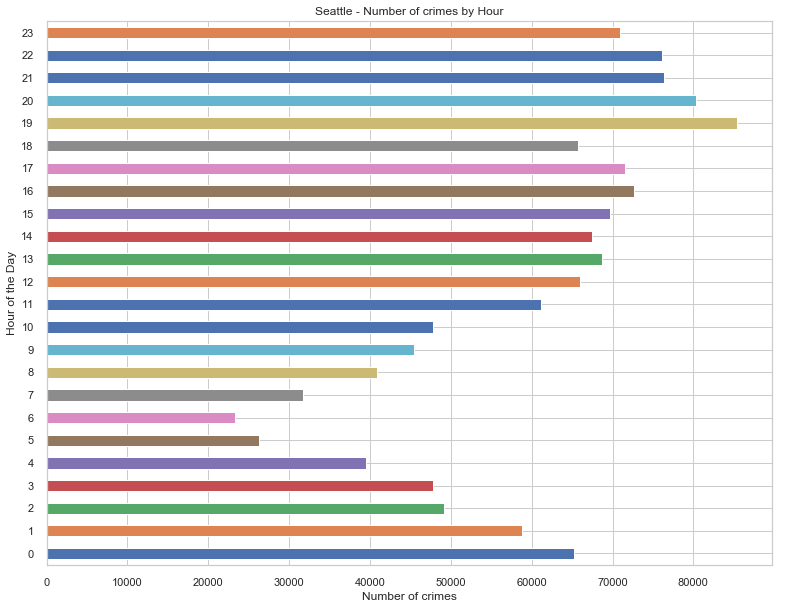

In [547]:
# Number of Crimes by Hour
plt.figure(figsize=(13,10))
crimes.groupby([crimes['hour']]).size().plot(kind='barh')
plt.title('Seattle - Number of crimes by Hour')
plt.ylabel('Hour of the Day')
plt.xlabel('Number of crimes')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


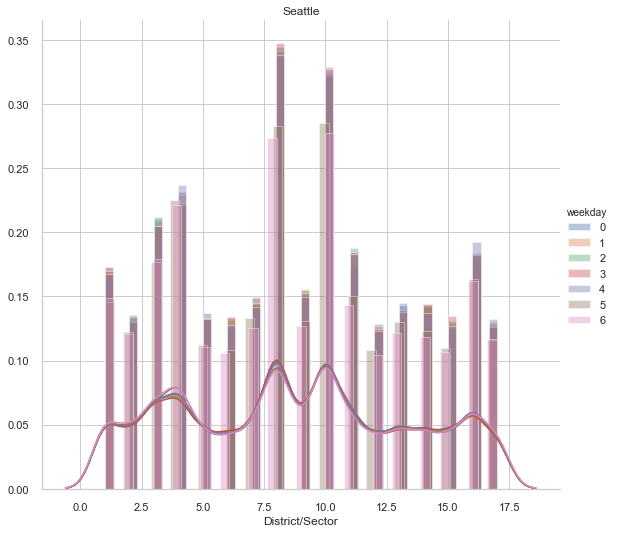

In [521]:
sns.FacetGrid(crimes_learn, hue='weekday',height=8).map(sns.distplot, 'District/Sector').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Seattle')
plt.show()

## Drop 'day' column

In [522]:
crimes_learn = crimes_learn[['CrimeType', 'month', 'weekday', 'hour', 'District/Sector']]
crimes_learn.head(2)

,CrimeType,month,weekday,hour,District/Sector
662706,16.0,6,0,21,17.0
474264,15.0,8,2,16,16.0


In [544]:
# Value Counts 

print('CrimeType: ', crimes_learn["CrimeType"].value_counts().size)
print()

print('month: ', crimes_learn["month"].value_counts().size)
print()

print('weekday: ', crimes_learn["weekday"].value_counts().size)
print()

print('hour: ', crimes_learn["hour"].value_counts().size)
print()

print('District/Sector: ', crimes_learn["District/Sector"].value_counts().size)

CrimeType:  17

month:  12

weekday:  7

hour:  24

District/Sector:  17


# Modeling with scikit-learn

In [523]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pickle

## Split the dataset into a training set and a testing set

In [524]:
# X = crimes_learn.drop(['District'], axis=1)
# y = crimes_learn['District']
# print(X.head(2))
# print(X.shape,'\n')
# print(y.head(2))
# print(y.shape)

## Inspired by: 
#### https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [525]:
# create a Validation Dataset
X = crimes_learn.drop(['District/Sector'], axis=1)
Y = crimes_learn['District/Sector']
print(X.head(2))
print("X.shape ", X.shape,'\n')
print(Y.head(2))
print("Y.shape ", Y.shape)

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

        CrimeType  month  weekday  hour
662706       16.0      6        0    21
474264       15.0      8        2    16
X.shape  (500000, 4) 

662706    17.0
474264    16.0
Name: District/Sector, dtype: float64
Y.shape  (500000,)


In [526]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [527]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Let’s evaluate several algorithms:

In [528]:
# Build Models
# Spot Check Algorithms
print("Seattle:")
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Seattle:


C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\lo

LR: 0.112017 (0.001066)
LDA: 0.112100 (0.001087)
KNN: 0.097018 (0.001035)
CART: 0.116007 (0.001896)
NB: 0.117735 (0.001643)


## Compare Algorithms

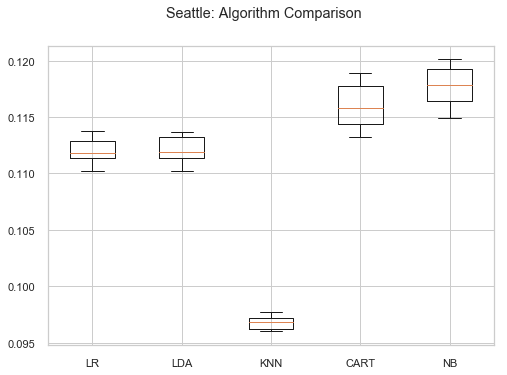

In [529]:
fig = plt.figure()
fig.suptitle('Seattle: Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Make Predictions

In [530]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print("KNeighborsClassifier")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

KNeighborsClassifier
0.09582
[[1071  581  698  623  286  182  211  435  184  450  211   80  103  120
    94  185   92]
 [ 771  483  542  547  194  147  177  467  141  291  147   62   97   93
    60  158   84]
 [1163  643  967  786  260  227  262  864  154  699  177   98  136  155
   104  205   97]
 [1219  747  967  998  326  246  258 1158  178  723  249   97  121  155
   100  268  120]
 [ 831  482  536  507  241  164  192  334  132  291  169   53   86   94
    71  125   89]
 [ 762  407  525  485  217  192  171  422  129  357  172   61   75   86
    66  144   67]
 [ 910  501  601  533  249  159  200  388  162  354  161   53  122  112
   102  180   90]
 [1386  844 1287 1163  393  308  283 2755  195 1383  219  159  151  170
   117  267   83]
 [ 955  536  578  566  290  175  203  410  178  369  200   77  105  118
    87  181  110]
 [1413  838 1430 1145  382  366  342 1955  231 1483  273  161  150  195
   125  298   99]
 [1046  645  723  686  298  214  220  493  189  425  224   77  115  134

In [531]:
# Make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print("LogisticRegression")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
0.11198
[[   0    0    0   16    0    0    0 4559    0 1031    0    0    0    0
     0    0    0]
 [   0    0    0   26    0    0    0 3588    0  847    0    0    0    0
     0    0    0]
 [   0    0    0   18    0    0    0 5575    0 1404    0    0    0    0
     0    0    0]
 [   0    0    0   26    0    0    0 6152    0 1752    0    0    0    0
     0    0    0]
 [   0    0    0   18    0    0    0 3615    0  764    0    0    0    0
     0    0    0]
 [   0    0    0   15    0    0    0 3611    0  712    0    0    0    0
     0    0    0]
 [   0    0    0   17    0    0    0 3926    0  934    0    0    0    0
     0    0    0]
 [   0    0    0   17    0    0    0 9191    0 1955    0    0    0    0
     0    0    0]
 [   0    0    0   17    0    0    0 4199    0  922    0    0    0    0
     0    0    0]
 [   0    0    0   11    0    0    0 8894    0 1981    0    0    0    0
     0    0    0]
 [   0    0    0   17    0    0    0 4928    0  989    0    0    0    0
 

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [532]:
# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print("LinearDiscriminantAnalysis")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

LinearDiscriminantAnalysis
0.11197
[[   0    0    0   30    0    0    0 4559    0 1017    0    0    0    0
     0    0    0]
 [   0    0    0   45    0    0    0 3594    0  822    0    0    0    0
     0    0    0]
 [   0    0    0   25    0    0    0 5586    0 1386    0    0    0    0
     0    0    0]
 [   0    0    0   41    0    0    0 6172    0 1717    0    0    0    0
     0    0    0]
 [   0    0    0   35    0    0    0 3620    0  742    0    0    0    0
     0    0    0]
 [   0    0    0   29    0    0    0 3617    0  692    0    0    0    0
     0    0    0]
 [   0    0    0   29    0    0    0 3931    0  917    0    0    0    0
     0    0    0]
 [   0    0    0   25    0    0    0 9195    0 1943    0    0    0    0
     0    0    0]
 [   0    0    0   30    0    0    0 4212    0  896    0    0    0    0
     0    0    0]
 [   0    0    0   21    0    0    0 8904    0 1961    0    0    0    0
     0    0    0]
 [   0    0    0   28    0    0    0 4932    0  974    0    0    

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [533]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)

print("DecisionTreeClassifier")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

DecisionTreeClassifier
0.11486
[[ 718  304  469  719  219  146  239  680  222  722  355   53  129  145
   112  241  133]
 [ 483  251  345  655  167   98  223  623  182  512  252   46   87  150
    95  187  105]
 [ 680  309  744  873  219  167  265 1311  173 1101  294   78  121  146
   118  286  112]
 [ 706  337  704 1251  243  166  295 1622  256 1102  318   83  118  168
   114  307  140]
 [ 511  225  363  586  195  121  203  507  169  520  273   41   94  147
    88  215  139]
 [ 445  204  351  555  164  144  184  657  138  683  229   29   68  123
    71  200   93]
 [ 585  254  420  580  196  143  245  604  205  625  282   49  108  155
    91  219  116]
 [ 722  359  817 1080  269  222  259 4092  219 1894  337   88  134  163
   106  296  106]
 [ 524  279  377  644  213  139  240  654  217  704  320   65  114  161
   135  230  122]
 [ 749  342  924 1204  270  257  298 2960  242 2300  355  103  145  170
   106  329  132]
 [ 668  323  489  709  264  160  252  750  250  795  374   64  126  1

In [534]:
# Make predictions on validation dataset
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)

print("GaussianNB")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

GaussianNB
0.1162
[[   0    0  194  558    0    0    0 3458    0 1271  125    0    0    0
     0    0    0]
 [   0    0  190  515    0    0    0 2744    0  928   84    0    0    0
     0    0    0]
 [   0    0  314  586    0    0    0 4215    0 1713  169    0    0    0
     0    0    0]
 [   0    0  303  925    0    0    0 4930    0 1632  140    0    0    0
     0    0    0]
 [   0    0  190  412    0    0    0 2780    0  911  104    0    0    0
     0    0    0]
 [   0    0  177  427    0    0    0 2711    0  927   96    0    0    0
     0    0    0]
 [   0    0  201  512    0    0    0 2994    0 1041  129    0    0    0
     0    0    0]
 [   0    0  349  752    0    0    0 7284    0 2612  166    0    0    0
     0    0    0]
 [   0    0  201  511    0    0    0 3158    0 1161  107    0    0    0
     0    0    0]
 [   0    0  346  706    0    0    0 6722    0 2968  144    0    0    0
     0    0    0]
 [   0    0  266  521    0    0    0 3704    0 1314  129    0    0    0
     0    

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [535]:
# # Split the dataset into a training set and a testing set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
# print(X_train.shape)
# print(X_test.shape)
# print()
# print(y_train.shape)
# print(y_test.shape)

## Logistic Regression

In [536]:
# # train the model on the training set
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

In [537]:
# # save the model to disk (Pickle)
# filename = 'finalized_Philadelphia_LR_model.sav'
# pickle.dump(logreg, open(filename, 'wb'))

## Accuracy score

In [538]:
# # make predictions on the training set
# y_pred = logreg.predict(X_test)

# # compare actual response values (y_test) with predicted response values (y_pred)
# print(metrics.accuracy_score(y_test, y_pred))

## K Nearest Neighbors - Optimize k value

In [539]:
# k_range = list(range(1,26))
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     scores.append(metrics.accuracy_score(y_test, y_pred))

## Plot the relationship between k and testing accuracy

In [540]:
# plt.plot(k_range, scores)
# plt.xlabel('Value of k for KNN')
# plt.ylabel('Accuracy Score')
# plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
# plt.show()

# Choosing KNN to Model Ward Prediction with k = ?????
### After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [541]:
# # instantiate the model with the best known parameters
# knn = KNeighborsClassifier(n_neighbors=12)

# # train the model with X and y (not X_train and y_train)
# knn.fit(X, y)

# #PICKLE
# # save the model to disk (pickle)
# filename = 'finalized_Philadelphia_KNN_model.sav'
# pickle.dump(knn, open(filename, 'wb'))

## Make prediction on out-of-sample data

In [542]:
# # make a prediction for an example of an out-of-sample observation
# # predict Ward from knn.predict([['New_Crime_Code','month','weekday','hour','Police_Districts']])
# knn.predict([[17.0,3,5,12]])

In [543]:
# knn.predict([[2.0,2,2,23]])